# Analyzing tips dataset and running ML models(linear regression,polynomial regression,) on it

In [1]:
# importing tools for use in the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# importing dataset
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [3]:
data.columns.tolist()

['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size']

In [4]:
# tip column is the target variable in this scenario

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [6]:
data.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


In [7]:
data

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6
...,...,...,...,...,...,...,...
739,3164.27,645.28,Male,No,Sat,Dinner,3
740,2962.62,218.00,Female,Yes,Sat,Dinner,2
741,2471.03,218.00,Male,Yes,Sat,Dinner,2
742,1942.38,190.75,Male,No,Sat,Dinner,2


# EDA

In [8]:
# grouping by the size of the party

In [9]:
size_grouping = data.groupby("size").mean()
size_grouping

,total_bill,tip
size,,
1,2214.127381,301.372024
2,1953.691059,304.738136
3,2211.257594,346.365940
4,2347.499528,353.597717
5,2272.219383,323.407037
6,2258.164819,338.582892


Text(0, 0.5, 'average total bill')

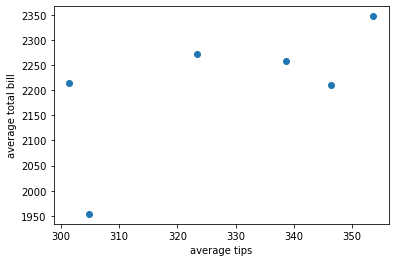

In [10]:
# plotting this
ax = plt.axes()
ax.scatter(size_grouping["tip"],size_grouping["total_bill"])
plt.xlabel("average tips")
plt.ylabel("average total bill")

In [11]:
# as seen above, there is no linearity between the total bill of a certain size of party and its correspoding tips

In [12]:
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

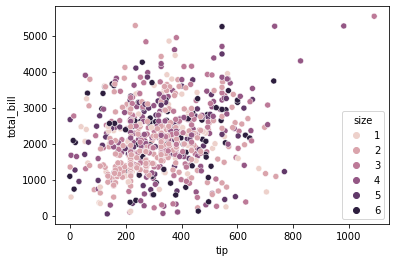

In [13]:
sns.scatterplot(data["tip"],data["total_bill"],hue=data["size"])

In [14]:
# clearly the size of the party gives no indication to the amount of tips that'll be given

In [15]:
size_index_data = data.set_index("size")
size_index_data.head()

,total_bill,tip,gender,smoker,day,time
size,,,,,,
1,2125.50,360.79,Male,No,Thur,Lunch
5,2727.18,259.42,Female,No,Sun,Dinner
4,1066.02,274.68,Female,Yes,Thur,Dinner
1,3493.45,337.90,Female,No,Sun,Dinner
6,3470.56,567.89,Male,Yes,Sun,Lunch


In [16]:
size_index_data.sort_values("size")

,total_bill,tip,gender,smoker,day,time
size,,,,,,
1,2125.50,360.79,Male,No,Thur,Lunch
1,2793.67,224.54,Male,No,Sat,Lunch
1,1950.01,358.61,Male,No,Mon,Lunch
1,4450.47,377.14,Female,Yes,Wed,Lunch
1,2055.74,208.19,Male,No,Wed,Dinner
...,...,...,...,...,...,...
6,1978.35,245.25,Male,No,Wed,Lunch
6,3219.86,344.44,Female,Yes,Fri,Lunch
6,1981.62,406.57,Male,Yes,Tues,Dinner


In [17]:
data.groupby('size').agg([np.mean, np.median]) 

total_bill                   tip        
             mean    median        mean  median
size                                           
1     2214.127381  2281.915  301.372024  324.82
2     1953.691059  1792.505  304.738136  281.22
3     2211.257594  2108.060  346.365940  334.63
4     2347.499528  2290.090  353.597717  327.00
5     2272.219383  2389.280  323.407037  311.74
6     2258.164819  2383.830  338.582892  330.27

#grouping by gender

In [18]:
data.pivot_table(index="gender",values=["tip","total_bill"])

,tip,total_bill
gender,,
Female,325.041254,2159.99606
Male,326.690856,2169.11066


<AxesSubplot:xlabel='gender', ylabel='tip'>

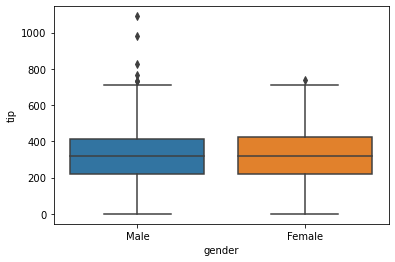

In [19]:
# plotting this
sns.boxplot(x=data["gender"],y=data["tip"])

In [20]:
# on average, the males and females pay nearly the same tip, but note that there are some outliers in the male boxplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='total_bill'>

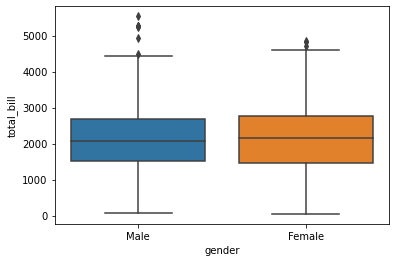

In [21]:
sns.boxplot(data["gender"],data["total_bill"])

In [22]:
# On average the males have slightly more total bills but females have a slightly higher range

In [23]:
male_data = data[data["gender"] == "Male"]
male_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  409 non-null    float64
 1   tip         409 non-null    float64
 2   gender      409 non-null    object 
 3   smoker      409 non-null    object 
 4   day         409 non-null    object 
 5   time        409 non-null    object 
 6   size        409 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 25.6+ KB


In [24]:
male_data[["tip","total_bill"]]

,tip,total_bill
0,360.79,2125.50
4,567.89,3470.56
8,347.71,2895.04
9,253.97,2622.54
10,499.22,2572.40
...,...,...
736,109.00,1373.40
737,127.53,3578.47
739,645.28,3164.27
741,218.00,2471.03


In [25]:
# looking at the outliers
male_tip_outliers = male_data[male_data["tip"] > 400]

In [26]:
male_total_bill_outlier = male_data[male_data["total_bill"] > 3000]

In [27]:
male_tip_outliers["tip"].mean(),data["tip"].mean()

(515.4349557522123, 325.9480913978498)

In [28]:
male_total_bill_outlier["total_bill"].mean(),data["total_bill"].mean()

(3657.544545454545, 2165.006639784948)

In [29]:
male_tip_outliers.corr(),male_total_bill_outlier.corr()

(            total_bill       tip      size
 total_bill    1.000000  0.428238  0.080168
 tip           0.428238  1.000000  0.126388
 size          0.080168  0.126388  1.000000,
             total_bill       tip      size
 total_bill    1.000000  0.418256  0.051523
 tip           0.418256  1.000000  0.192279
 size          0.051523  0.192279  1.000000)

In [30]:
male_data.corr()

,total_bill,tip,size
total_bill,1.00000,0.29805,0.09097
tip,0.29805,1.00000,0.14895
size,0.09097,0.14895,1.00000


In [31]:
# seems like the outliers have a better correlation than the rest of the data,
# people who had way more than average total bill tended to pay more tips too

[Text(0.5, 0, 'tips'),
 Text(0, 0.5, 'total bill'),
 Text(0.5, 1.0, "Visualization of outliers of the males' tips ")]

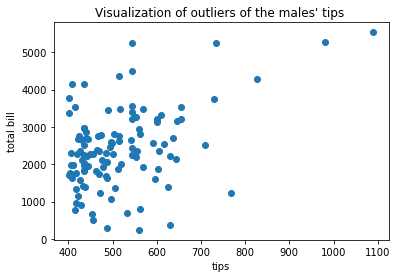

In [32]:
ax = plt.axes()
ax.scatter(male_tip_outliers["tip"],male_tip_outliers["total_bill"])
ax.set(xlabel="tips",ylabel="total bill",title="Visualization of outliers of the males' tips ")

In [33]:
# yea, slightly more correlaton 

[Text(0.5, 0, 'tips'),
 Text(0, 0.5, 'total bill'),
 Text(0.5, 1.0, "Visualization of outliers of the males' total bill ")]

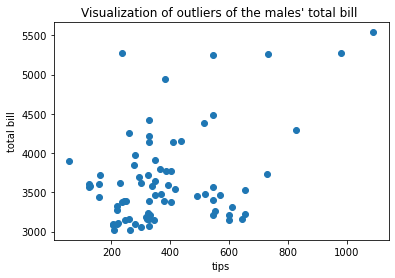

In [34]:
ax = plt.axes()
ax.scatter(male_total_bill_outlier["tip"],male_total_bill_outlier["total_bill"])
ax.set(xlabel="tips",ylabel="total bill",title="Visualization of outliers of the males' total bill ")

In [35]:
# same goes for the total bill

In [36]:
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [37]:
# grouping by whether they are smokers or not

In [38]:
data.pivot_table(index="smoker",values=["total_bill","tip"])

,tip,total_bill
smoker,,
No,330.576734,2112.055754
Yes,320.623815,2225.915462


In [39]:
data.pivot_table(index="smoker",values=["total_bill","tip"],columns="size")

tip                                                            \
size             1           2           3           4         5           6   
smoker                                                                         
No      291.877778  295.635039  340.988333  383.142676  329.7795  362.127727   
Yes     308.492708  315.712897  353.992364  316.138929  317.1900  312.019487   

         total_bill                                                      \
size              1            2            3            4            5   
smoker                                                                    
No      2345.498333  1809.349302  2025.164103  2408.823239  2272.704500   
Yes     2115.599167  2127.710561  2475.172000  2269.749821  2271.746098   

                     
size              6  
smoker               
No      2337.653636  
Yes     2168.485128

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='tip'>

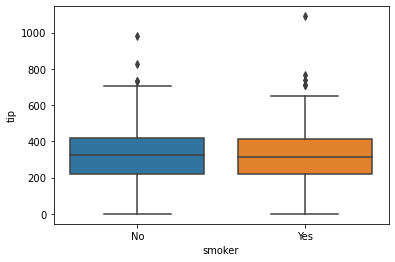

In [40]:
sns.boxplot(data["smoker"],data["tip"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

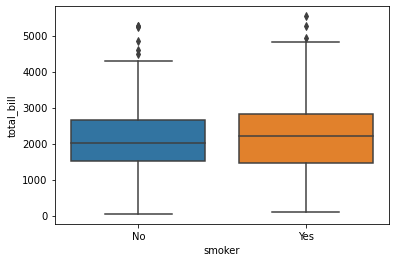

In [41]:
sns.boxplot(data["smoker"],data["total_bill"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='tip'>

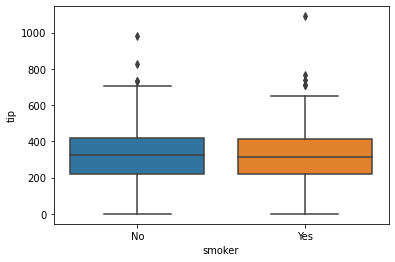

In [42]:
sns.boxplot(data["smoker"],data["tip"])

In [43]:
# the smokers and non smokers gave almost the same amounts of tips and had almost the total bill too, 
# but we will look at the outliers as seen above

In [44]:
data.smoker

0       No
1       No
2      Yes
3       No
4      Yes
      ... 
739     No
740    Yes
741    Yes
742     No
743     No
Name: smoker, Length: 744, dtype: object

In [45]:
no_smoker_data = data[data["smoker"] == "No"]
yes_smoker_data = data[data["smoker"] == "Yes"]

In [46]:
no_smoker_data.total_bill.describe()

count     398.000000
mean     2112.055754
std       935.305865
min        44.690000
25%      1523.547500
50%      2027.945000
75%      2654.695000
max      5267.970000
Name: total_bill, dtype: float64

In [47]:
yes_smoker_data.total_bill.describe()

count     346.000000
mean     2225.915462
std       973.377488
min        97.010000
25%      1466.050000
50%      2208.340000
75%      2821.737500
max      5538.290000
Name: total_bill, dtype: float64

In [48]:
no_smoker_data

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
3,3493.45,337.90,Female,No,Sun,Dinner,1
6,4607.43,374.96,Female,No,Thur,Dinner,4
7,1165.21,700.87,Female,No,Mon,Dinner,2
...,...,...,...,...,...,...,...
735,1097.63,136.25,Male,No,Sat,Dinner,2
738,3905.47,509.03,Female,No,Sat,Dinner,3
739,3164.27,645.28,Male,No,Sat,Dinner,3
742,1942.38,190.75,Male,No,Sat,Dinner,2


In [49]:
no_smoker_totalbill_outliers = no_smoker_data[no_smoker_data["total_bill"] > 4000]
no_smoker_tips_outliers = no_smoker_data[no_smoker_data["tip"] > 700]
yes_smoker_totalbill_outliers = yes_smoker_data[yes_smoker_data["total_bill"] > 4500 ]
yes_smoker_tips_outliers = yes_smoker_data[yes_smoker_data["tip"] > 650 ]

In [50]:
no_smoker_totalbill_outliers.describe(),yes_smoker_totalbill_outliers.describe()

(        total_bill        tip       size
 count    10.000000   10.00000  10.000000
 mean   4654.954000  525.38000   3.900000
 std     470.664698  253.88396   1.595131
 min    4116.930000  197.29000   1.000000
 25%    4269.802500  360.24500   3.250000
 50%    4548.570000  490.50000   4.000000
 75%    5149.977500  686.42750   4.750000
 max    5267.970000  981.00000   6.000000,
         total_bill          tip      size
 count     5.000000     5.000000  5.000000
 mean   5057.818000   504.670000  3.000000
 std     344.456729   348.706316  0.707107
 min    4698.990000   234.350000  2.000000
 25%    4828.700000   272.500000  3.000000
 50%    4943.150000   381.500000  3.000000
 75%    5279.960000   545.000000  3.000000
 max    5538.290000  1090.000000  4.000000)

In [51]:
no_smoker_tips_outliers.describe(),yes_smoker_tips_outliers.describe()

(       total_bill         tip      size
 count     6.00000    6.000000  6.000000
 mean   3397.53000  779.350000  3.500000
 std    2019.99734  108.790519  1.760682
 min     655.09000  700.870000  1.000000
 25%    1808.58250  710.680000  2.500000
 50%    4017.74000  731.935000  4.000000
 75%    5020.26750  803.057500  4.000000
 max    5267.97000  981.000000  6.000000,
         total_bill          tip      size
 count     6.000000     6.000000  6.000000
 mean   2585.843333   777.351667  3.333333
 std    1632.860117   158.048371  1.032796
 min    1085.640000   650.730000  2.000000
 25%    1434.167500   708.500000  3.000000
 50%    2299.900000   723.215000  3.000000
 75%    2934.280000   760.820000  3.750000
 max    5538.290000  1090.000000  5.000000)

[Text(0.5, 0, 'tips'),
 Text(0, 0.5, 'total bill'),
 Text(0.5, 1.0, "Outliers of non smokers' tips")]

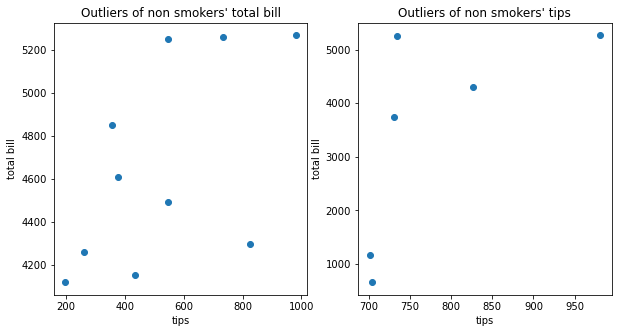

In [52]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax.flatten()
ax[0].scatter(no_smoker_totalbill_outliers["tip"],no_smoker_totalbill_outliers["total_bill"])
ax[1].scatter(no_smoker_tips_outliers["tip"],no_smoker_tips_outliers["total_bill"])
ax[0].set(xlabel="tips",ylabel="total bill",title="Outliers of non smokers' total bill")
ax[1].set(xlabel="tips",ylabel="total bill",title="Outliers of non smokers' tips")

[Text(0.5, 0, 'tips'),
 Text(0, 0.5, 'total bill'),
 Text(0.5, 1.0, "Outliers of non smokers' tips")]

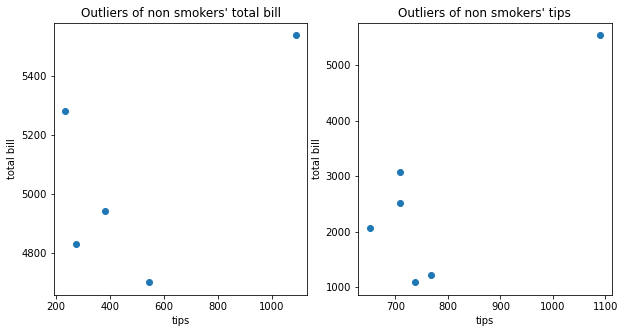

In [53]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax.flatten()
ax[0].scatter(yes_smoker_totalbill_outliers["tip"],yes_smoker_totalbill_outliers["total_bill"])
ax[1].scatter(yes_smoker_tips_outliers["tip"],yes_smoker_tips_outliers["total_bill"])
ax[0].set(xlabel="tips",ylabel="total bill",title="Outliers of non smokers' total bill")
ax[1].set(xlabel="tips",ylabel="total bill",title="Outliers of non smokers' tips")

In [54]:
# with this visualizations above, we see that the outliers of smokers and non-smokers total bill and tips have no correllaton

In [55]:
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [56]:
# grouping by day and time

In [57]:
data.pivot_table(values=["total_bill","tip"],columns=["day","time"]).T

tip   total_bill
day  time                           
Fri  Dinner  302.725405  1908.825676
     Lunch   281.790952  2143.277381
Mon  Dinner  332.948286  2269.816000
     Lunch   312.394000  1992.520000
Sat  Dinner  330.918810  2159.160238
     Lunch   323.254872  2148.445897
Sun  Dinner  341.110000  2289.430000
     Lunch   347.604516  2259.112903
Thur Dinner  348.564324  2063.134324
     Lunch   316.740515  2030.051959
Tues Dinner  346.366512  2323.398372
     Lunch   323.325143  2271.809143
Wed  Dinner  318.988500  2280.443500
     Lunch   317.289091  2171.643333

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='tip'>

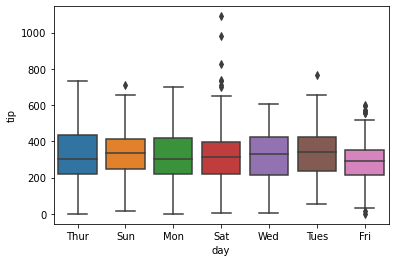

In [58]:
sns.boxplot(data.day,data.tip)

In [59]:
# On average, there seems to be equal tips given out each day but we see a bunch of outliers on saturday and sunday and friday
# on weekends, which makes sense

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='tip'>

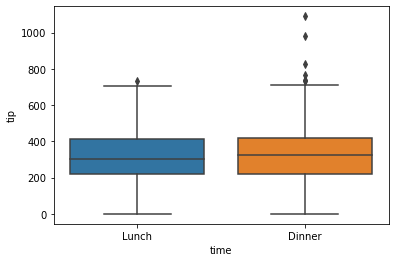

In [60]:
sns.boxplot(data.time,data.tip)

In [61]:
# Lunch and dinner almost gave the same amount of tips, but there's a bunch of outliers during dinner, which kind of makes sense too

In [62]:
day_outliers = data[data["day"] == "Sat"]


In [63]:
day_outliers = day_outliers[day_outliers["tip"] > 600]

In [64]:
day_outliers.head(),day_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 33 to 739
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  13 non-null     float64
 1   tip         13 non-null     float64
 2   gender      13 non-null     object 
 3   smoker      13 non-null     object 
 4   day         13 non-null     object 
 5   time        13 non-null     object 
 6   size        13 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 832.0+ bytes


(     total_bill     tip  gender smoker  day    time  size
 33      1085.64  737.93  Female    Yes  Sat  Dinner     2
 45      2358.76  648.55  Female    Yes  Sat   Lunch     4
 108     1866.08  602.77    Male    Yes  Sat  Dinner     3
 228     2452.50  697.60  Female     No  Sat  Dinner     2
 393     2210.52  602.77  Female    Yes  Sat   Lunch     5,
 None)

In [65]:
day_outliers.pivot_table(values="tip",columns=["gender","smoker","time","size"]).T

tip
gender smoker time   size         
Female No     Dinner 2     697.600
              Lunch  5     623.480
       Yes    Dinner 2     737.930
                     3     708.500
              Lunch  4     648.550
                     5     602.770
Male   No     Dinner 3     645.280
                     4     846.930
       Yes    Dinner 3     846.385
              Lunch  6     600.590

In [66]:
# no size party of 1 paid a tip above 650

In [67]:
# during dinners on saturdays, male smokers paid more tips than female smokers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='tip'>

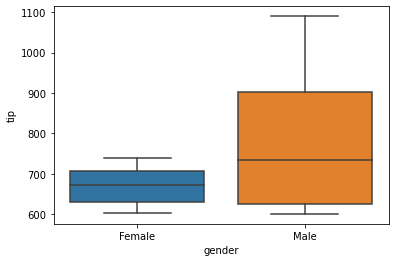

In [68]:
sns.boxplot(day_outliers["gender"],day_outliers["tip"])

In [69]:
# as seen above, on saturdays, males paid way more tips than females, which is quite understandable too

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

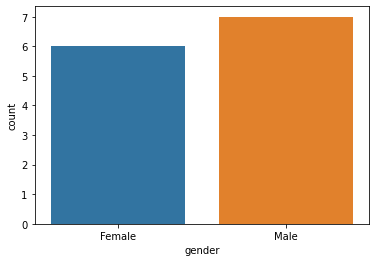

In [70]:
sns.countplot(day_outliers["gender"])

In [71]:
# we see here that there are almost the same number of males and females, so the males paid more tips above 650, not just because 
# there were more males

In [72]:
# full picture

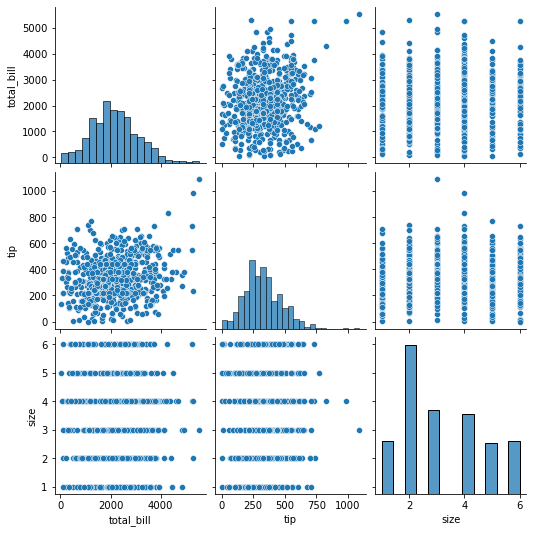

In [73]:
sns.pairplot(data=data)

# feature engineering

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [75]:
# no null values, so no need for imputation, but we have to encode the object columns to numerical variables

In [76]:
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


<AxesSubplot:>

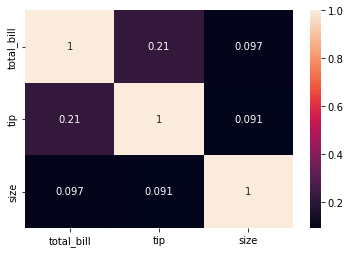

In [77]:
sns.heatmap(data.corr(),annot=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

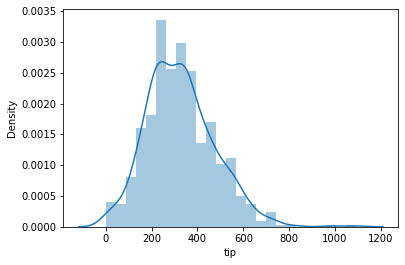

In [78]:
sns.distplot(data.tip)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

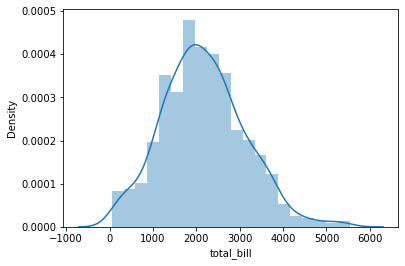

In [79]:
sns.distplot(data.total_bill)

In [80]:
pd.get_dummies(data)

,total_bill,tip,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,360.79,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,259.42,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,274.68,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,337.90,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,567.89,6,0,1,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,3164.27,645.28,3,0,1,1,0,0,0,1,0,0,0,0,1,0
740,2962.62,218.00,2,1,0,0,1,0,0,1,0,0,0,0,1,0
741,2471.03,218.00,2,0,1,0,1,0,0,1,0,0,0,0,1,0
742,1942.38,190.75,2,0,1,1,0,0,0,1,0,0,0,0,1,0


In [81]:
# the size column is a numerical column but, it's supposed to be a categorical one

In [82]:
data["size"] = data["size"].astype("category")

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  744 non-null    float64 
 1   tip         744 non-null    float64 
 2   gender      744 non-null    object  
 3   smoker      744 non-null    object  
 4   day         744 non-null    object  
 5   time        744 non-null    object  
 6   size        744 non-null    category
dtypes: category(1), float64(2), object(4)
memory usage: 35.9+ KB


In [84]:
encoded_data = pd.get_dummies(data)

In [85]:
encoded_data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,2125.50,360.79,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2727.18,259.42,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1066.02,274.68,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3493.45,337.90,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,3470.56,567.89,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [86]:
# now we can scale the tip column and the total bill column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ready_data = scaler.fit_transform(encoded_data[["tip","total_bill"]])

In [87]:
ready_data

array([[ 0.23434442, -0.04142863],
       [-0.44746364,  0.58952292],
       [-0.34482587, -1.15245201],
       ...,
       [-0.72605188,  0.3209113 ],
       [-0.90933362, -0.23345736],
       [ 0.00707507, -0.12372665]])

In [88]:
encoded_data[["tip","total_bill"]] = ready_data

In [89]:
encoded_data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,0.234344,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.589523,-0.447464,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.152452,-0.344826,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.393072,0.080388,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,1.369068,1.627286,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [90]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [91]:
# our data is a little imbalanced, I'll use 50 sets of data each to train the data on and get the average

In [92]:
encoded_data

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,0.234344,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.589523,-0.447464,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.152452,-0.344826,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.393072,0.080388,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,1.369068,1.627286,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,1.047877,2.147806,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
740,0.836417,-0.726052,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
741,0.320911,-0.726052,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
742,-0.233457,-0.909334,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [94]:
X = encoded_data

In [95]:
X.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,0.234344,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.589523,-0.447464,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.152452,-0.344826,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.393072,0.080388,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,1.369068,1.627286,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [107]:
y = encoded_data["tip"]

In [108]:
y

0      0.234344
1     -0.447464
2     -0.344826
3      0.080388
4      1.627286
         ...   
739    2.147806
740   -0.726052
741   -0.726052
742   -0.909334
743    0.007075
Name: tip, Length: 744, dtype: float64

In [109]:
X = encoded_data.drop(["tip"],axis=1)

In [110]:
X.head()

,total_bill,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1,0.589523,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,-1.152452,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,1.393072,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,1.369068,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [111]:
X.shape

(744, 20)

In [112]:
y.shape

(744,)

# model building 

In [113]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

In [114]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [115]:
model.intercept_

-0.06339561345217694

In [116]:
# the y intercept on our model

In [117]:
model.coef_.tolist()

[0.1959264939940938,
 0.01584192775309312,
 -0.015841927753093028,
 0.011142869882454432,
 -0.011142869882454404,
 -0.07447635568103318,
 0.04330817445506718,
 -0.0974742413678837,
 0.13097923280449325,
 0.14296127842891976,
 0.06878537915086319,
 -0.2140834677904262,
 0.05314556430399867,
 -0.053145564303998596,
 -0.2326782847139807,
 -0.08861089499127053,
 0.23113016462999336,
 0.12122561686522176,
 -0.0662124112980992,
 0.03514580950813532]

In [118]:
Variable_Coeff = pd.DataFrame(model.coef_,train_X.columns,columns=["Coefficients"])
Variable_Coeff

,Coefficients
total_bill,0.195926
gender_Female,0.015842
gender_Male,-0.015842
smoker_No,0.011143
smoker_Yes,-0.011143
day_Fri,-0.074476
day_Mon,0.043308
day_Sat,-0.097474
day_Sun,0.130979
day_Thur,0.142961


In [119]:
# this means that a one unit increase in the variables will lead to a corresponding increase of the coefficients shown above

# Predictions

In [120]:
prediction = model.predict(test_X)

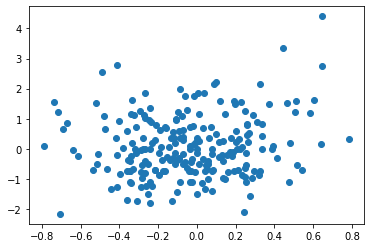

In [121]:
plt.scatter(prediction,test_y)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

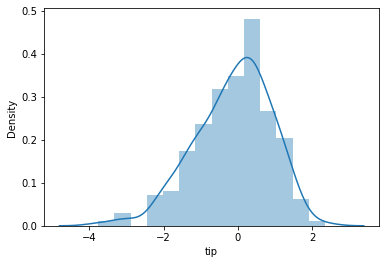

In [122]:
sns.distplot((prediction-test_y))

In [156]:
# our residuals look like a normal or skewed

# evaluation using RMSE

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
mean_squared_error(test_y,prediction)

1.0655871999514637

In [126]:
np.sqrt(mean_squared_error(test_y,prediction))

1.0322728321289212

In [128]:
# maybe our data was overfitted and we're not supposed to scale our target variable

In [130]:
data.head(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  744 non-null    float64 
 1   tip         744 non-null    float64 
 2   gender      744 non-null    object  
 3   smoker      744 non-null    object  
 4   day         744 non-null    object  
 5   time        744 non-null    object  
 6   size        744 non-null    category
dtypes: category(1), float64(2), object(4)
memory usage: 35.9+ KB


(   total_bill     tip  gender smoker   day    time size
 0     2125.50  360.79    Male     No  Thur   Lunch    1
 1     2727.18  259.42  Female     No   Sun  Dinner    5
 2     1066.02  274.68  Female    Yes  Thur  Dinner    4
 3     3493.45  337.90  Female     No   Sun  Dinner    1
 4     3470.56  567.89    Male    Yes   Sun   Lunch    6,
 None)

# Scaling only the total bill column

In [134]:
scaled_data = scaler.fit_transform(data[["total_bill"]])

In [135]:
data.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [137]:
data = pd.get_dummies(data)

In [138]:
data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,2125.50,360.79,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2727.18,259.42,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1066.02,274.68,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3493.45,337.90,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,3470.56,567.89,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [139]:
new_data = data.copy()

In [140]:
new_data["total_bill"] = scaled_data

In [141]:
new_data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,360.79,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.589523,259.42,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.152452,274.68,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.393072,337.90,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,1.369068,567.89,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [142]:
# our new data is ready to be split into training and testing data

In [143]:
y = new_data["tip"]
X = new_data.drop(["tip"],axis=1)

In [144]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

# model building

In [145]:
model = LinearRegression()

In [146]:
model.fit(train_X,train_y)

LinearRegression()

In [149]:
predict = model.predict(test_X)

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Real tip values'),
 Text(0.5, 1.0, 'Scatterplot of prediction vs real values')]

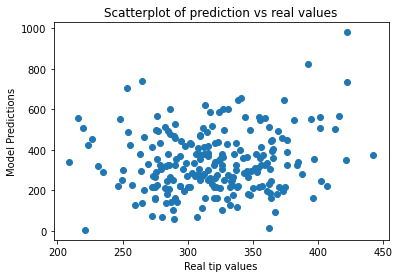

In [153]:
ax = plt.axes()
ax.scatter(predict,test_y)
ax.set(ylabel = "Model Predictions", xlabel = "Real tip values",title = "Scatterplot of prediction vs real values")

<AxesSubplot:ylabel='Density'>

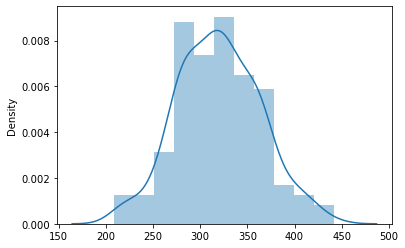

In [155]:
sns.distplot(predict)

In [157]:
# this distribution is better

# model evaluation using RMSE

In [161]:
mean_squared_error(test_y,predict)

23555.02783525186

In [162]:
np.sqrt(mean_squared_error(test_y,predict))

153.47647323043316

In [163]:
# this shows a better RMSE value

# using polynomial regression, using degrees 2 and 3

In [165]:
from sklearn.preprocessing import PolynomialFeatures

In [166]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [178]:
train_X1 = poly.fit(train_X)

In [182]:
#model.fit(train_X1,train_y)

In [183]:
#train_X1,test_X1,train_y,test_y = train_test_split(X1,y,test_size=0.3,random_state=42)

In [184]:
X.head()

,total_bill,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,-0.041429,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1,0.589523,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,-1.152452,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,1.393072,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,1.369068,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [187]:
X["total_bill"] 

0      0.041429
1      0.589523
2      1.152452
3      1.393072
4      1.369068
         ...   
739    1.047877
740    0.836417
741    0.320911
742    0.233457
743    0.123727
Name: total_bill, Length: 744, dtype: float64

In [188]:
data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,2125.50,360.79,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2727.18,259.42,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1066.02,274.68,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3493.45,337.90,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,3470.56,567.89,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [190]:
data["total_bill2"] = data["total_bill"] ** 2

In [191]:
data["total_bill3"] = data["total_bill"] ** 3

In [192]:
data.head()

,total_bill,tip,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,...,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill2,total_bill3
0,2125.50,360.79,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,4.517750e+06,9.602478e+09
1,2727.18,259.42,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,7.437511e+06,2.028343e+10
2,1066.02,274.68,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1.136399e+06,1.211424e+09
3,3493.45,337.90,1,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1.220419e+07,4.263474e+10
4,3470.56,567.89,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1.204479e+07,4.180215e+10


In [194]:
X1 = data.drop(["total_bill","tip","total_bill3"],axis=1)

In [195]:
X1

,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill2
0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,4.517750e+06
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,7.437511e+06
2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.136399e+06
3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1.220419e+07
4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.204479e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.001260e+07
740,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,8.777117e+06
741,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,6.105989e+06
742,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3.772840e+06


In [199]:
scaled = scaler.fit_transform(X1[["total_bill2"]])

In [200]:
X1["total_bill2"] = scaled

In [201]:
X1.head()

,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill2
0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,-0.232100
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.396035
2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.959538
3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1.421503
4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.387209


In [202]:
train_X1,test_X1,train_y,test_y = train_test_split(X1,y,test_size=0.3,random_state=42)

In [203]:
model.fit(train_X1,train_y)

LinearRegression()

In [206]:
f_predict = model.predict(test_X1)

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Real tip values'),
 Text(0.5, 1.0, 'Scatterplot of prediction vs real values using degree of 2')]

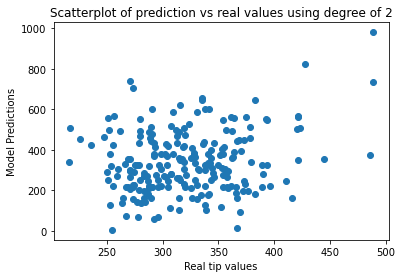

In [207]:
ax = plt.axes()
ax.scatter(f_predict,test_y)
ax.set(ylabel = "Model Predictions", xlabel = "Real tip values",title = "Scatterplot of prediction vs real values using degree of 2")

In [208]:
mean_squared_error(f_predict,test_y)

22661.668554017855

In [209]:
np.sqrt(mean_squared_error(f_predict,test_y))

150.53793061556897

# using a degree of 3

In [218]:
X2 = data.drop(["total_bill","tip","total_bill2"],axis=1)

In [219]:
X2.head()

,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill3
0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,9.602478e+09
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2.028343e+10
2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.211424e+09
3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4.263474e+10
4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4.180215e+10


In [220]:
scaled = scaler.fit_transform(X2[["total_bill3"]])

In [221]:
X2["total_bill3"] = scaled

In [223]:
X2.head()

,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6,total_bill3
0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,-0.322602
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.186834
2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.722820
3,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1.252896
4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.213186


In [224]:
train_X2,test_X2,train_y,test_y = train_test_split(X2,y,test_size=0.3,random_state=42)

In [225]:
model.fit(train_X2,train_y)

LinearRegression()

In [228]:
f1_predict = model.predict(test_X2)

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Real tip values'),
 Text(0.5, 1.0, 'Scatterplot of prediction vs real values using degree of 3')]

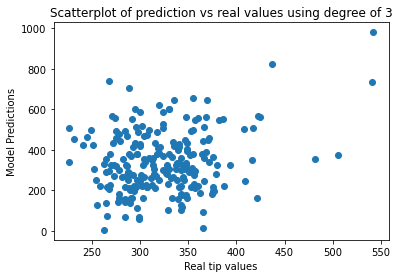

In [229]:
ax = plt.axes()
ax.scatter(f1_predict,test_y)
ax.set(ylabel = "Model Predictions", xlabel = "Real tip values",title = "Scatterplot of prediction vs real values using degree of 3")

In [230]:
mean_squared_error(f1_predict,test_y)

22307.440708035712

In [231]:
np.sqrt(mean_squared_error(f1_predict,test_y))

149.3567564860583

In [ ]:
# so as we see above, changing our features to polynomial ones gave a better model 